In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load in information to a dataframe
df = pd.read_csv('../data/Border_Crossing_Data.csv')

In [3]:
df.head()

,Port Name,State,Port Code,Border,Date,Measure,Value,Latitude,Longitude,Point
0,Jackman,Maine,104,US-Canada Border,Jan 2024,Trucks,6556,45.806,-70.397,POINT (-70.396722 45.805661)
1,Porthill,Idaho,3308,US-Canada Border,Apr 2024,Trucks,98,49.000,-116.499,POINT (-116.49925 48.999861)
2,San Luis,Arizona,2608,US-Mexico Border,Apr 2024,Buses,10,32.485,-114.782,POINT (-114.7822222 32.485)
3,Willow Creek,Montana,3325,US-Canada Border,Jan 2024,Pedestrians,2,49.000,-109.731,POINT (-109.731333 48.999972)
4,Warroad,Minnesota,3423,US-Canada Border,Jan 2024,Personal Vehicle Passengers,9266,48.999,-95.377,POINT (-95.376555 48.999)


In [7]:
# CLEANING DATA

In [4]:
# remove the lat, lon, and point columns as we are not using them, and are irrelevant to the analysis
df = df.drop(["Latitude", "Longitude", "Point"], axis=1)


In [5]:
# first convert the "date" column to datetime objects, and then dt.to_period("M") sets it to monthly
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

C:\Users\maxim\AppData\Local\Temp\ipykernel_9968\2822041116.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


Port Name            object
State                object
Port Code             int64
Border               object
Date         datetime64[ns]
Measure              object
Value                 int64
dtype: object

In [6]:
def plot_graph(x_axis: list[int], y_axis: list[int], title: str, x_label: str, y_label: str) -> None:
    plt.figure(figsize=(25,5))
    plt.plot(x_axis, y_axis)
    
    plt.title(title)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.show()

In [23]:
# Select only the info from us-mexico border in calexico
calexico_df =  df[df['Port Name'] == 'Calexico']

# Filter the DataFrame to include only 'Personal Vehicle Passengers' and 'Pedestrians'
filtered_calexico = calexico_df[calexico_df['Measure'].isin(['Personal Vehicle Passengers', 'Pedestrians'])]

# Group by date and sum the values for both measures combined. reset_index() is used to convert the grouped data back into a DataFrame with index staring from 0
calexico_grouped = filtered_calexico.groupby("Date")["Value"].sum().reset_index()

In [26]:
# Remove zero values
calexico_cleaned = calexico_grouped[calexico_grouped['Value'] > 0]

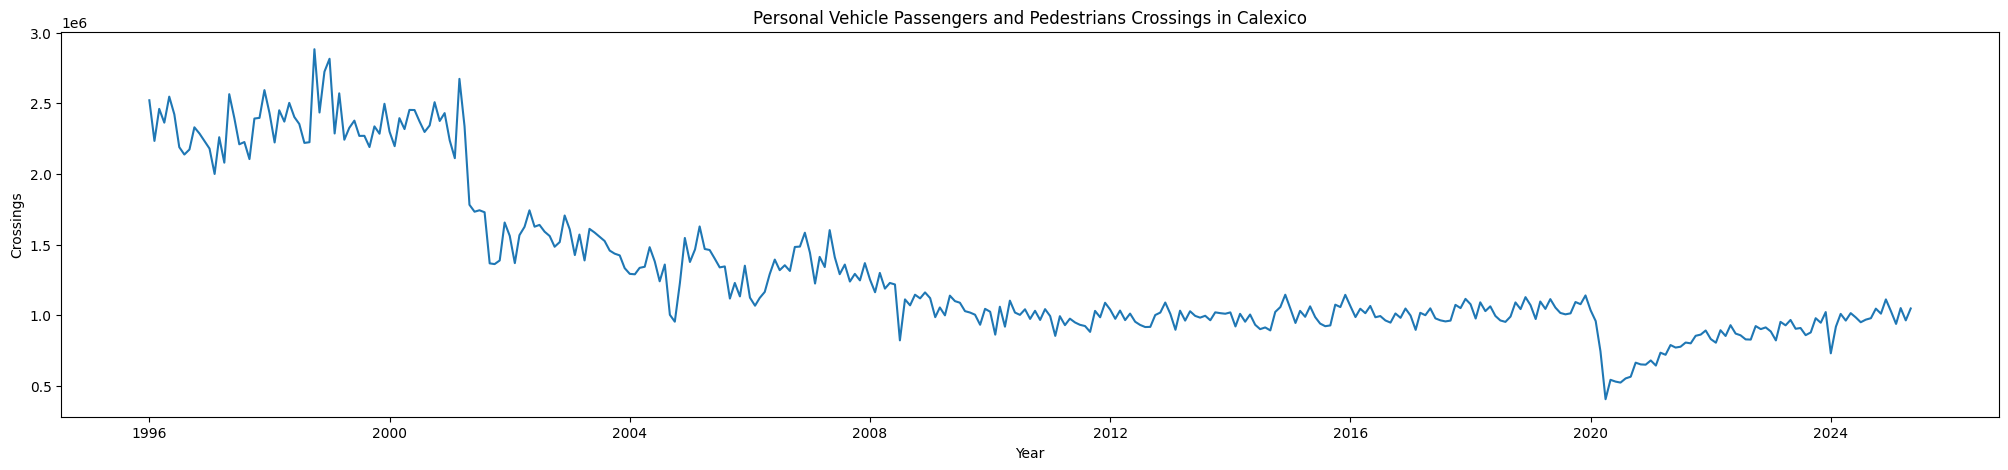

In [27]:
plot_graph(
    calexico_cleaned["Date"], 
    calexico_cleaned["Value"], 
    "Personal Vehicle Passengers and Pedestrians Crossings in Calexico", 
    "Year", 
    "Crossings"
)

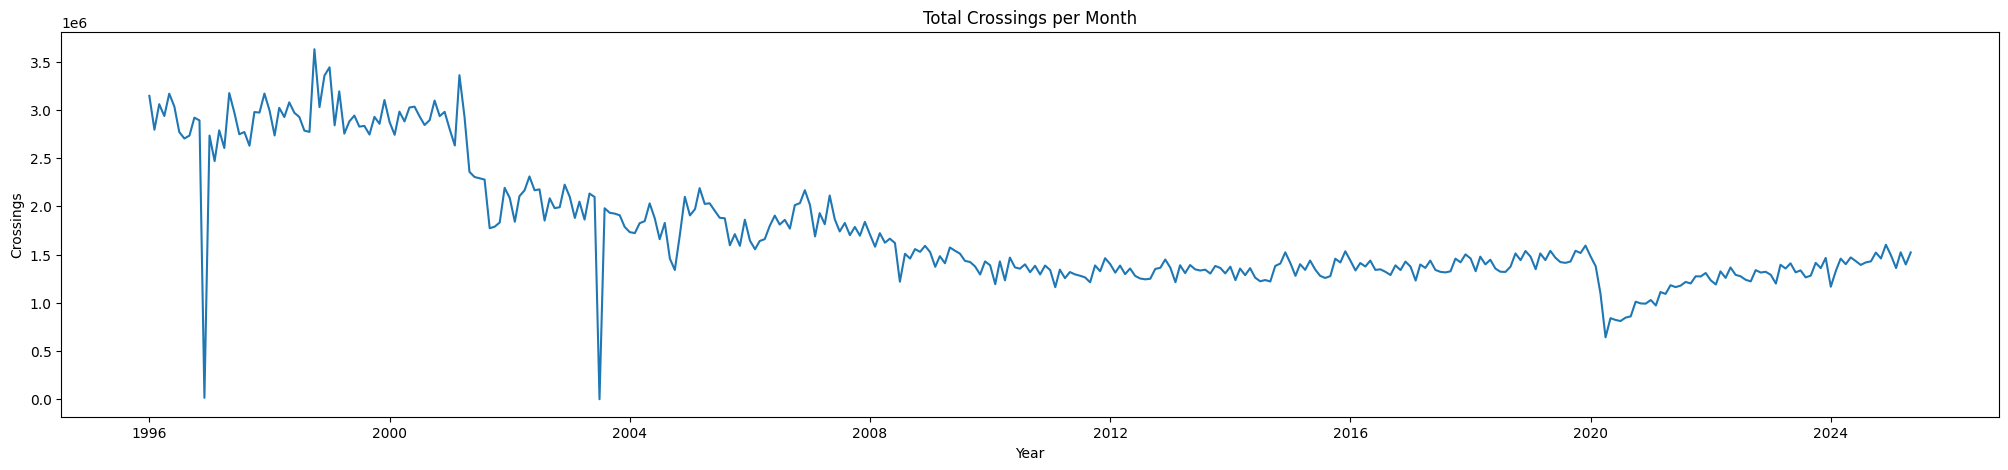